In [1]:
import sys
import os
path = os.getenv("saved_path") #saved path to nablachem, saved in a .txt file
sys.path.insert(0, "path")

# For 2D and 3D representations

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

# For 3D representation with Py3DMol

from rdkit.Chem import rdDistGeom
from rdkit.Chem import rdDepictor
from IPython.display import Image
import py3Dmol
from rdkit.Chem.Draw import IPythonConsole

# Graph representation

import networkx as nx
import matplotlib.pyplot as plt

In [2]:
import nablachem.space as ncs

In [3]:
# create the 
s = ncs.SearchSpace()

In [4]:
# add elements to the workspace

s.add_element(ncs.Element("C", [4]))  # C  4
s.add_element(ncs.Element("Cl", [1]))  # Cl  1
s.add_element(ncs.Element("H", [1]))  # H  1

In [5]:
# Generate combinations
n_atoms = 3
combinations = list(s.list_cases_bare(n_atoms))
print(combinations)

100%|██████████| 4/4 [00:00<?, ?it/s]

[None, [('C', 4, 3)]]


In [6]:
s.add_element(ncs.Element("O", [2])) # O  2 one extra element was added to the space

In [7]:
# Generate combinations
combinations = list(s.list_cases_bare(n_atoms))
print(combinations)

100%|██████████| 10/10 [00:00<00:00, 33554.43it/s]

[None, [('C', 4, 3)], None, [('O', 2, 1), ('C', 4, 2)], None, [('O', 2, 2), ('C', 4, 1)], None, [('O', 2, 3)], None, [('H', 1, 2), ('O', 2, 1)], [('Cl', 1, 1), ('H', 1, 1), ('O', 2, 1)], [('Cl', 1, 2), ('O', 2, 1)]]


With one element more (total 4) the number of possible representation has increased dramatically

In [8]:
# New instance

s = ncs.SearchSpace()

# add elements to this space

s.add_element(ncs.Element("C", [4])) 
s.add_element(ncs.Element("O", [2]))
s.add_element(ncs.Element("N", [3]))

# Generate combinations, now for 4 atoms

n_atoms = 4
combinations = list(s.list_cases_bare(n_atoms))

# Print the combinations

print("The set has ", len(combinations), "combinations")


for combination in combinations:
    #if combination is not None:
        print(combination)

100%|██████████| 15/15 [00:00<00:00, 15008.24it/s]

The set has  18 combinations
None
[('C', 4, 4)]
None
[('N', 3, 2), ('C', 4, 2)]
None
[('N', 3, 4)]
None
[('O', 2, 1), ('C', 4, 3)]
None
[('O', 2, 1), ('N', 3, 2), ('C', 4, 1)]
None
[('O', 2, 2), ('C', 4, 2)]
None
[('O', 2, 2), ('N', 3, 2)]
None
[('O', 2, 3), ('C', 4, 1)]
None
[('O', 2, 4)]


In [9]:
# New instance

s = ncs.SearchSpace()

# add elements to this space

s.add_element(ncs.Element("C", [4])) 
s.add_element(ncs.Element("Cl", [1]))
s.add_element(ncs.Element("H", [1]))

# Generate combinations, now for x atoms

n_atoms = 35
combinations = list(s.list_cases_bare(n_atoms))

# Print the combinations

print("The set has ", len(combinations), "combinations")


for combination in combinations:
    #if combination is not None:
        print(combination)

100%|██████████| 36/36 [00:00<00:00, 30621.57it/s]

The set has  182 combinations
None
[('C', 4, 35)]
None
[('H', 1, 2), ('C', 4, 33)]
[('Cl', 1, 1), ('H', 1, 1), ('C', 4, 33)]
[('Cl', 1, 2), ('C', 4, 33)]
None
[('H', 1, 4), ('C', 4, 31)]
[('Cl', 1, 1), ('H', 1, 3), ('C', 4, 31)]
[('Cl', 1, 2), ('H', 1, 2), ('C', 4, 31)]
[('H', 1, 1), ('Cl', 1, 3), ('C', 4, 31)]
[('Cl', 1, 4), ('C', 4, 31)]
None
[('H', 1, 6), ('C', 4, 29)]
[('Cl', 1, 1), ('H', 1, 5), ('C', 4, 29)]
[('Cl', 1, 2), ('H', 1, 4), ('C', 4, 29)]
[('Cl', 1, 3), ('H', 1, 3), ('C', 4, 29)]
[('H', 1, 2), ('Cl', 1, 4), ('C', 4, 29)]
[('H', 1, 1), ('Cl', 1, 5), ('C', 4, 29)]
[('Cl', 1, 6), ('C', 4, 29)]
None
[('H', 1, 8), ('C', 4, 27)]
[('Cl', 1, 1), ('H', 1, 7), ('C', 4, 27)]
[('Cl', 1, 2), ('H', 1, 6), ('C', 4, 27)]
[('Cl', 1, 3), ('H', 1, 5), ('C', 4, 27)]
[('Cl', 1, 4), ('H', 1, 4), ('C', 4, 27)]
[('H', 1, 3), ('Cl', 1, 5), ('C', 4, 27)]
[('H', 1, 2), ('Cl', 1, 6), ('C', 4, 27)]
[('H', 1, 1), ('Cl', 1, 7), ('C', 4, 27)]
[('Cl', 1, 8), ('C', 4, 27)]
None
[('H', 1, 10), ('C', 4, 2

In [10]:
# Generate only pure sequences

n_atoms = 4

sequences = list(s.list_cases_bare(n_atoms, degree_sequences_only=True)) #incluiding the "degree_sequences_only=True"
 
print(f"Valence sequences for {n_atoms} atoms: ")

for seq in sequences:
    print(seq)

100%|██████████| 5/5 [00:00<?, ?it/s]

Valence sequences for 4 atoms: 
None
[(4, 4)]
None
[(1, 2), (4, 2)]
[(1, 1), (1, 1), (4, 2)]


### 1
#### A define workspace must be defined

Adding Elements and their valences

In [11]:
s = ncs.SearchSpace()
s.add_element(ncs.Element("C", [4]))
s.add_element(ncs.Element("O", [2]))
s.add_element(ncs.Element("H", [1]))

### 2
#### Create a approximate counter 

Use the function ApproximateCounter
choose the number of atoms to be used
select the maximum number of each atom that there will be

In [12]:

# Use 'ApproximateCounter' to create an approximate counter 

c = ncs.ApproximateCounter()

# Count the combinations of more than 10 C and more than 5 H

n_atoms_counter = 15 # Select the number of atoms of the set

c.count(s, n_atoms_counter, ncs.Q("(C > 10) & (H > 5)"))

100%|██████████| 136/136 [00:00<?, ?it/s]


0

### 3
#### Generate SMILES of some random molecules of the designed space

As before, 
the number of atoms must be choosed
the number of structures wished
optional a condition can be given

In [13]:
# Use "random_sample" to generate a random sample of molecules with exactly 8 carbon atoms

n_atoms_groups = 10
n_displayed = 5

"""
n_atoms_groups = define the total number of atoms that are molecules will have
n_displayed = define how many SMILES of the molecules will be random selected and displayed
"""

mols = c.random_sample(s, n_atoms_groups, n_displayed)
# Print the SMILES of the molecules

for i in mols:
    print(i.SMILES)

hi


100%|██████████| 66/66 [00:00<00:00, 749.77it/s]


RS 29
C12=C3C45C67C44C85C54C61C53C278
OOC1OOOC1=O
O1C23C45C67C8=C5C82C1=C6C437
O1C23C45C6=C7C46C3=C2C17O5
OC12C34OC=5C2C31C54


Another generation adding a condition

In [31]:
# Use "random_sample" to generate a random sample of molecules with exactly x carbon atoms

n_atoms_groups = 17 
n_displayed = 8 
    

condition = "(C > 8) & (H > 5)" #any particular condition about the 

mols = c.random_sample(s, n_atoms_groups, n_displayed, ncs.Q(condition))

# Print the SMILES of the molecules

for mol in mols:
    print(mol.SMILES)

hi


100%|██████████| 171/171 [00:00<00:00, 85567.40it/s]

RS 4
O1C2C34C5(O3)C31C21CC5C41C3
O1C23C4C56C74C2C6=CC3C1C75
C=C1C23C4C56C(C31C51OC216)C4
OC1C2OC3C4=C3C31C4=CC32
OC=C1C=2C34C5OCC45C3C21
C=C1C23C4=CC5C4C(=C5)C3=C21
C1C23C4=C5C22C6C4C15C1C62C31
C=CC1C23C4C56C7C6=C2C13C574


### 2D and 3D representations

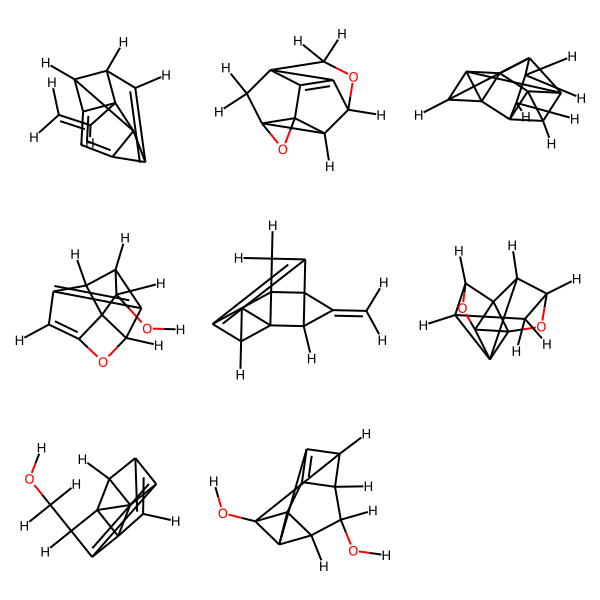

In [24]:
smiles_list = [] # blanck list

for mol in mols:
    smiles_list.append(mol.SMILES) #add the previously generated SMILES to a list

structures_list = []

for smiles in smiles_list:
    visual = Chem.MolFromSmiles(smiles) #2D Structure
    visual = Chem.AddHs(visual)
    AllChem.EmbedMolecule(visual, AllChem. ETKDGv3())
    structures_list.append(visual) #adding every structure to a list
    
img = Draw.MolsToGridImage(structures_list)
img #display the list of SMILES

## 3D visualization using py3Dmol

In [25]:
ps = rdDistGeom.ETKDGv3() 
ps.clearConfs= False #The previous conformations formed will not be deleted

In [26]:
smiles_list

['C=CC12C3=C=C4C=5C14C3C2C5',
 'O1C2C3C45CC6(C1)C2=C6C43O5',
 'C1C23C4C56C7(C8C96C7(C298)C453)C1',
 'OC1C2C3=C4C=C5OC3C15C24',
 'C=C1C23C45CC2=C2C65C4(C62)C13',
 'O1C2CC3C4OC56C44C2C36C514',
 'OCC1C=2C34C=C5C2C23C5C214',
 'OC1C2C34C5(O)C24C2=C3C1C52']

In [27]:
mol_list = [] #an empty list to save the generated optimised molecules

for smiles in smiles_list:
    
    # Covert SMILES to a RDKit molecule
    mol = Chem.MolFromSmiles(smiles) #2D Structure
    mol = Chem.AddHs(mol) #add H
    
    #Generate the 3D structure
    AllChem.EmbedMolecule(mol, AllChem. ETKDGv3())
    
    """
    Using MMFF94 for energy optimisation 
    Some structures cannot be optimised due to their structure
    An exception has been introduced to avoid any failure
    """
    try:
        AllChem.MMFFOptimizeMolecule(mol, maxIters=500)
        print(f"The optimisation process was successful for the molecule.: {smiles}")
    except Exception as e:
        print(f"Fail in energy optimisation: {smiles}")
        
    # Add the molecule to the list whether opmitised or not
    mol_list.append(mol)
    
    # 3D Visualization
    cid = rdDistGeom.EmbedMolecule(mol, ps)
    viewer = py3Dmol.view(width=300, height=300)
    IPythonConsole.addMolToView(mol,viewer, confId=cid)
    
    #Display
    viewer.zoomTo()
    viewer.show()

Fail in energy optimisation: C=CC12C3=C=C4C=5C14C3C2C5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Fail in energy optimisation: O1C2C3C45CC6(C1)C2=C6C43O5


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Fail in energy optimisation: C1C23C4C56C7(C8C96C7(C298)C453)C1


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Fail in energy optimisation: OC1C2C3=C4C=C5OC3C15C24


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Fail in energy optimisation: C=C1C23C45CC2=C2C65C4(C62)C13


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Fail in energy optimisation: O1C2CC3C4OC56C44C2C36C514


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Fail in energy optimisation: OCC1C=2C34C=C5C2C23C5C214


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

Fail in energy optimisation: OC1C2C34C5(O)C24C2=C3C1C52


3Dmol.js failed to load for some reason. Please check your browser console for error messages.

## ExactCounter method

useful when it is needed to count exactly how many molecules match a certain configuration

In [28]:
"""
# Generate the space

s = ncs.SearchSpace()

s.add_element(ncs.Element("C",[4]))
s.add_element(ncs.Element("O",[2]))
s.add_element(ncs.Element("H",[1]))

# Create the exact counter

exact_counter = ncs.ExactCounter(binary=True)

# Define a query for molecules with 2 Oxygen atoms

condition = "(O = 2)"
query = ncs.Q(condition)

# Number of atoms of the space

n_atoms = 6

# count how many molecules with n_atoms satisfy the query

exact_count = exact_counter.count(s, n_atoms)

#exact_count
"""

'\n# Generate the space\n\ns = ncs.SearchSpace()\n\ns.add_element(ncs.Element("C",[4]))\ns.add_element(ncs.Element("O",[2]))\ns.add_element(ncs.Element("H",[1]))\n\n# Create the exact counter\n\nexact_counter = ncs.ExactCounter(binary=True)\n\n# Define a query for molecules with 2 Oxygen atoms\n\ncondition = "(O = 2)"\nquery = ncs.Q(condition)\n\n# Number of atoms of the space\n\nn_atoms = 6\n\n# count how many molecules with n_atoms satisfy the query\n\nexact_count = exact_counter.count(s, n_atoms)\n\n#exact_count\n'

## Generate graphs

In [29]:
def generate_molecular_graph(mol):
    
    # Create an empty graph
    G = nx.Graph()
    
    # Adding nodes (atoms) to the graph
    for atom in mol.GetAtoms ():
        G.add_node(atom.GetIdx(), label=atom.GetSymbol())
        

    # Adding edges (links) to the graph
    for bond in mol.GetBonds():
        atom1 = bond.GetBeginAtomIdx()
        atom2 = bond.GetEndAtomIdx()
        G.add_edge(atom1, atom2)  # Add links to the 
    
    # Display the graph
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(G, 'label')
    
    plt.figure(figsize=(8,6))
    nx.draw (G, pos, labels=labels, with_labels=True, node_color='lightblue', font_size=12, node_size=500)
    plt.title(f"Molecular Graph for {smiles}")
    plt.show()

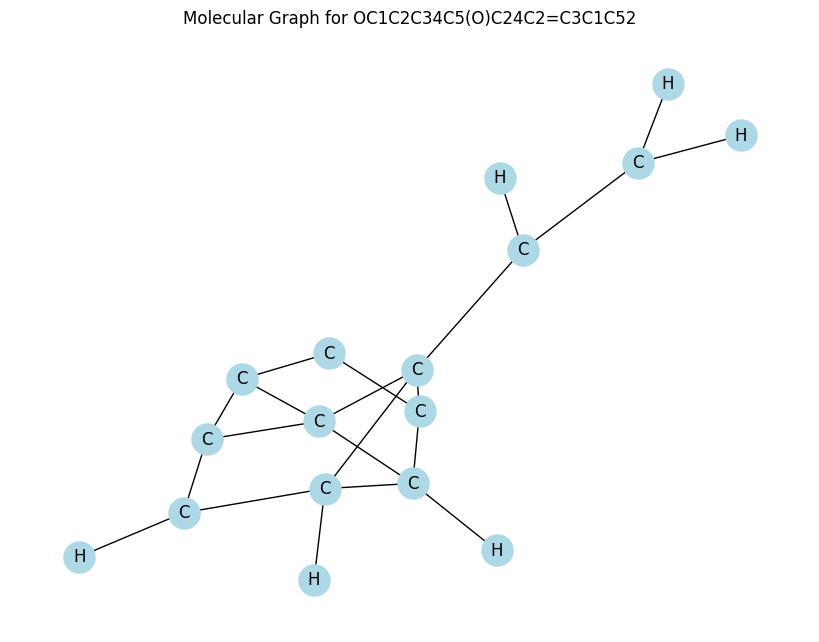

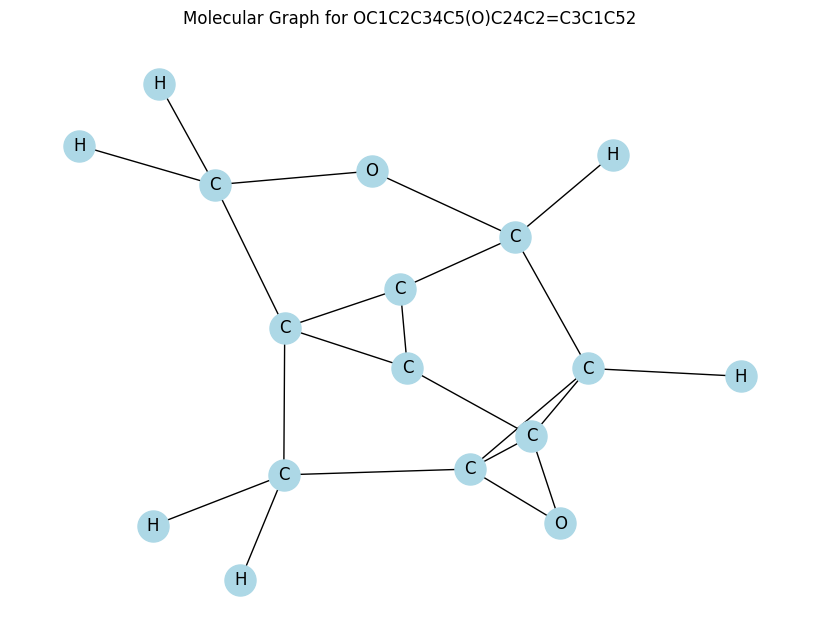

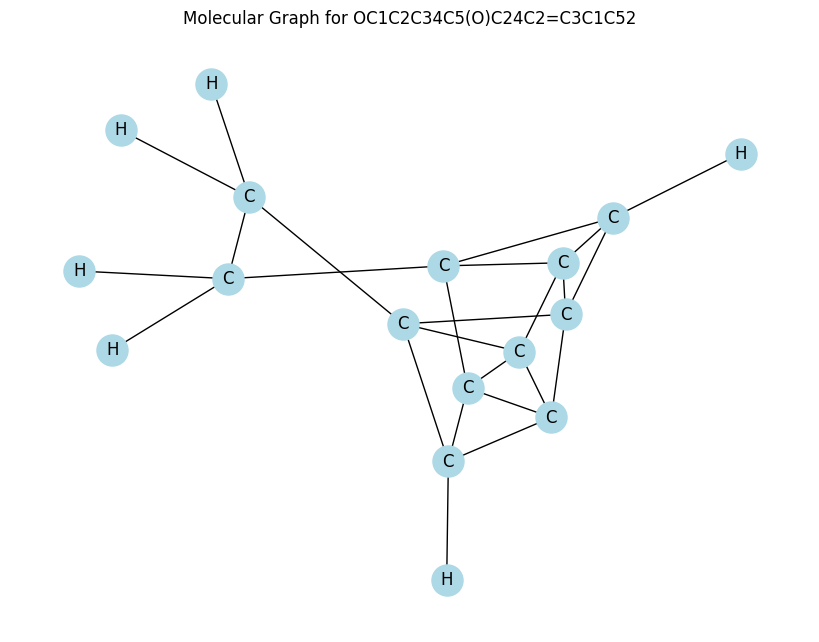

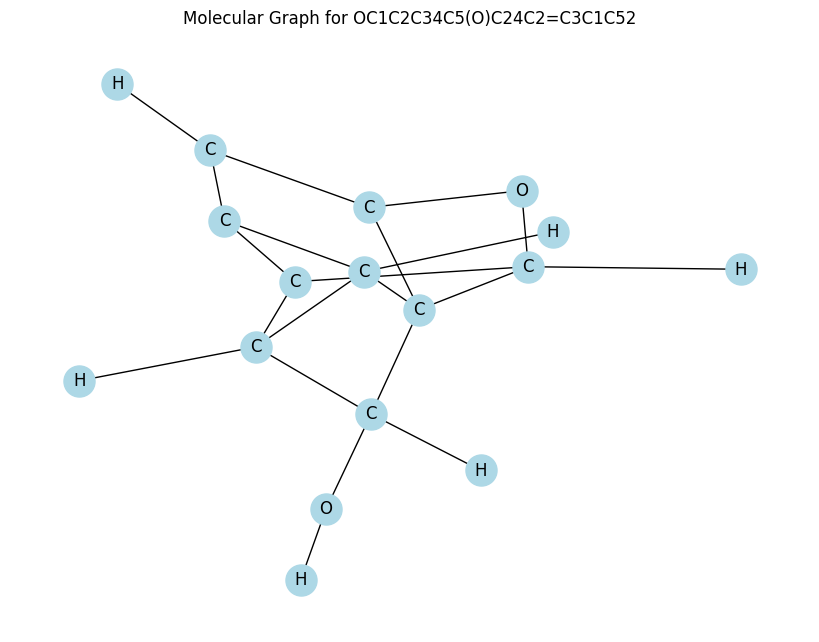

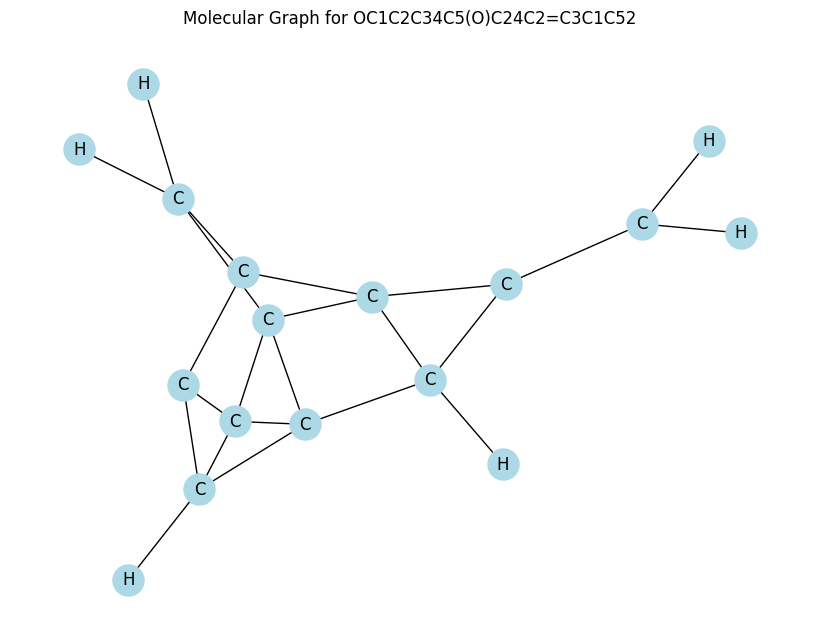

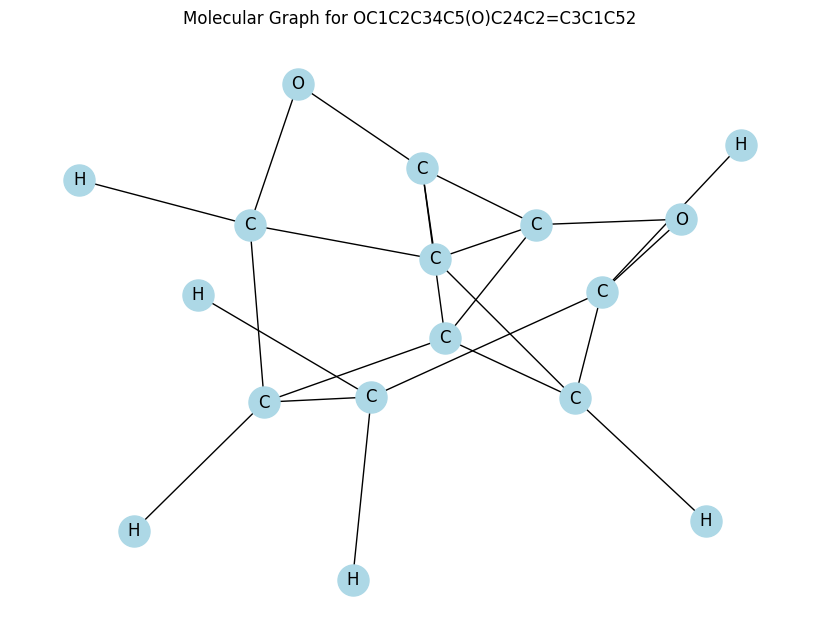

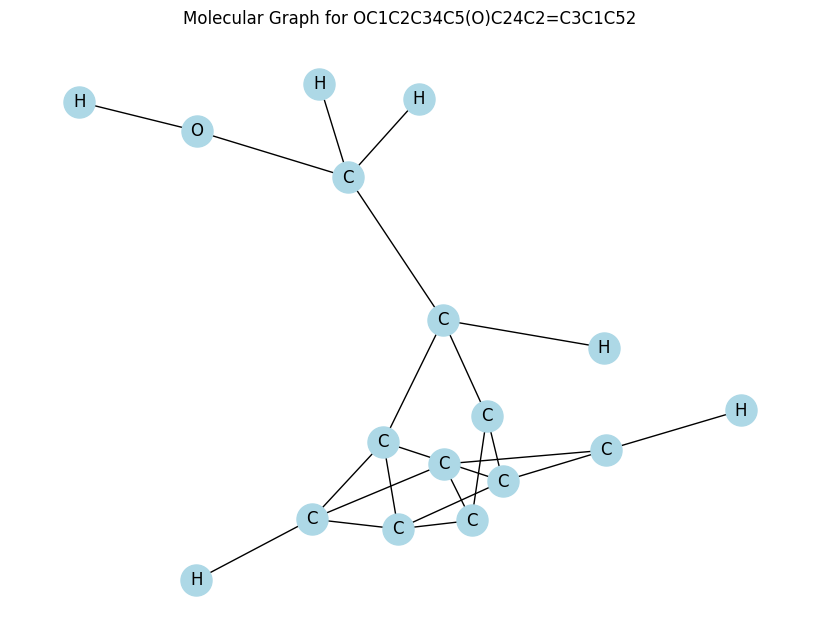

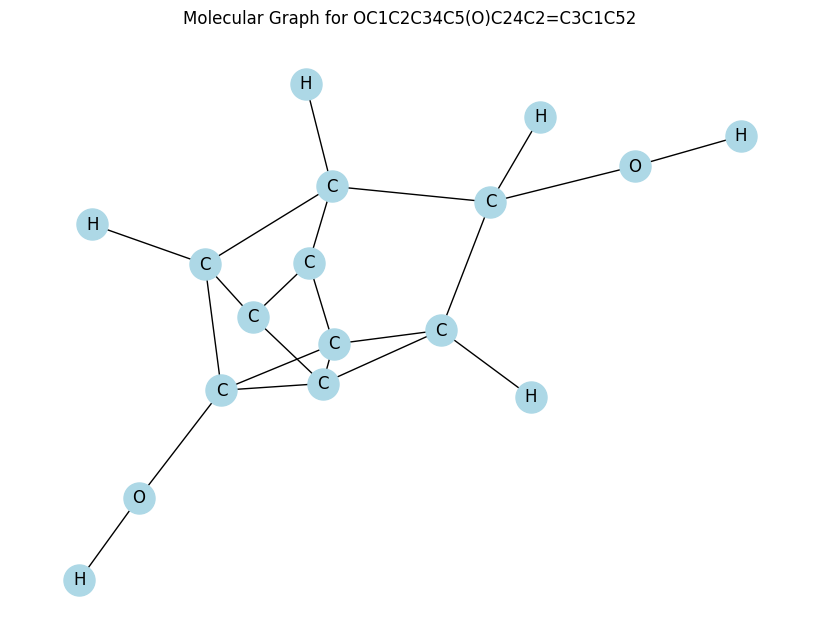

In [30]:
for mol in mol_list:
    generate_molecular_graph(mol)